In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
df=pd.read_csv('D:\Machine-learning-from-scratch\Linear-Regression\house_price_regression_dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\affan\AppData\Local\Temp\ipykernel_580\1594828714.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv('D:\Machine-learning-from-scratch\Linear-Regression\house_price_regression_dataset.csv')


### Data cleaning / feature engineering

In [4]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
df.shape # checking the shape of data (1000 rows , 8 columns (feature ))

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [7]:
# checking duplicates row
df.duplicated().sum()

np.int64(0)

In [8]:
# merging Num_bedrooms & Num_Bathrooms column into one column -> BHK 

df['BHK'] = df['Num_Bedrooms']+df['Num_Bathrooms']

In [9]:
df.drop(columns=['Num_Bedrooms','Num_Bathrooms'],inplace=True)

In [10]:
df.head()

,Square_Footage,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,BHK
0,1360,1981,0.599637,0,5,2.623829e+05,3
1,4272,2016,4.753014,1,6,9.852609e+05,6
2,3592,2016,3.634823,0,9,7.779774e+05,3
3,966,1977,2.730667,1,8,2.296989e+05,3
4,4926,1993,4.699073,0,8,1.041741e+06,3


In [11]:
# This will disable scientific notation in pandas display (doing this for understanding house price)
pd.set_option('display.float_format', '{:.2f}'.format)


In [12]:
df.head()

,Square_Footage,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,BHK
0,1360,1981,0.60,0,5,262382.85,3
1,4272,2016,4.75,1,6,985260.85,6
2,3592,2016,3.63,0,9,777977.39,3
3,966,1977,2.73,1,8,229698.92,3
4,4926,1993,4.70,0,8,1041740.86,3


### EDA


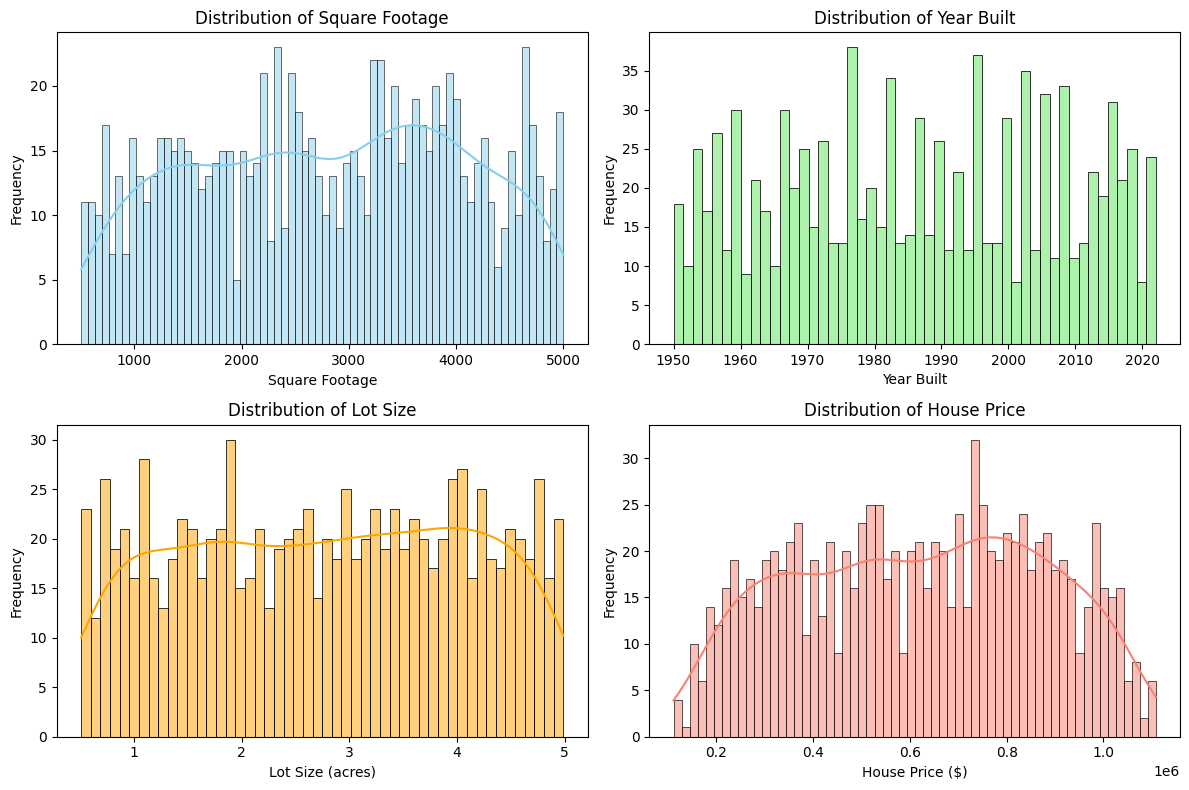

In [13]:
""""
Checking the distribution of numeric columns
"""


# Setting figure size
plt.figure(figsize=(12, 8))

# 1. Square Footage
plt.subplot(2, 2, 1)
sns.histplot(df['Square_Footage'], kde=True, color='skyblue' , bins=70)
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage')

# 2. Year Built
plt.subplot(2, 2, 2)
sns.histplot(df['Year_Built'],  color='lightgreen',bins=50)
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built')

# 3. Lot Size
plt.subplot(2, 2, 3)
sns.histplot(df['Lot_Size'], kde=True, color='orange',bins = 50)
plt.xlabel('Lot Size (acres)')
plt.ylabel('Frequency')
plt.title('Distribution of Lot Size')

# 4. House Price
plt.subplot(2, 2, 4)
sns.histplot(df['House_Price'], kde=True, color='salmon',bins =60)
plt.xlabel('House Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of House Price')


plt.tight_layout()
plt.show()


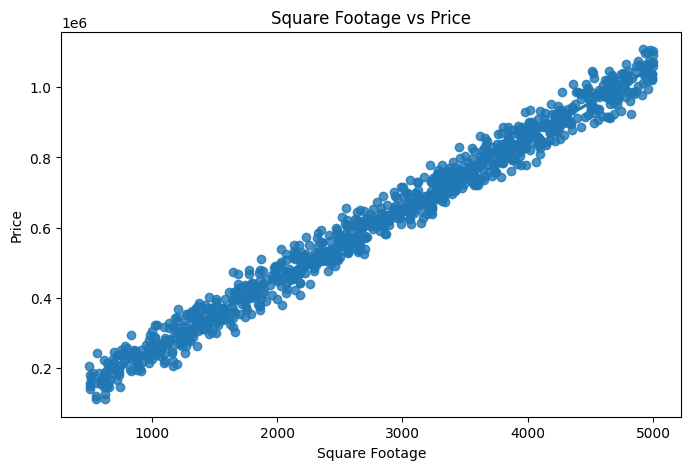

In [14]:


plt.figure(figsize=(8, 5))
sns.regplot(x='Square_Footage', y='House_Price', data=df)
plt.title('Square Footage vs Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


C:\Users\affan\AppData\Local\Temp\ipykernel_580\521764284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BHK', y='House_Price', data=df, palette='coolwarm')


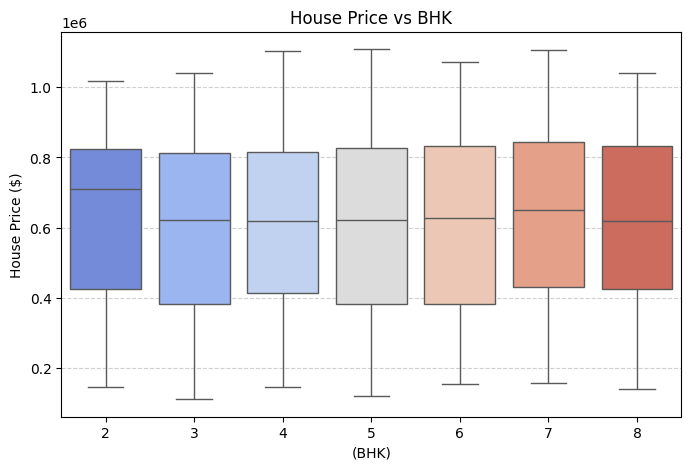

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='BHK', y='House_Price', data=df, palette='coolwarm')
plt.title('House Price vs BHK')
plt.xlabel('(BHK)')
plt.ylabel('House Price ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


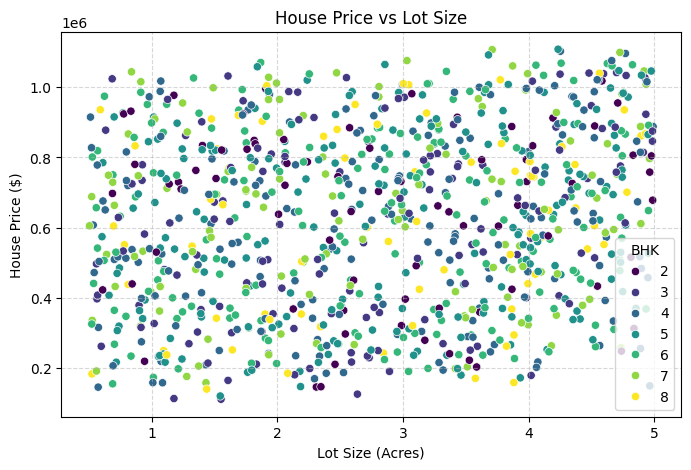

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Lot_Size', y='House_Price', data=df, hue='BHK', palette='viridis')
plt.title('House Price vs Lot Size')
plt.xlabel('Lot Size (Acres)')
plt.ylabel('House Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\affan\AppData\Local\Temp\ipykernel_580\3855025624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Garage_Size', y='House_Price', data=df, palette='Set2')


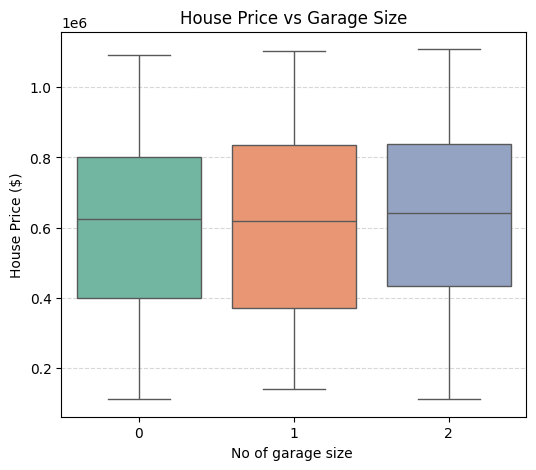

In [17]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Garage_Size', y='House_Price', data=df, palette='Set2')
plt.title('House Price vs Garage Size')
plt.xlabel('No of garage size ')
plt.ylabel('House Price ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


## Spilliting data

In [18]:
x = df.drop(columns='House_Price')
y = df.iloc[:,[-2]]

In [19]:
y

,House_Price
0,262382.85
1,985260.85
2,777977.39
3,229698.92
4,1041740.86
...,...
995,701494.00
996,683723.16
997,572024.02
998,964865.30


In [20]:
# spilling X_train , x_test  using own custom train_test_split class

from custom_preprocessing_utils import My_train_test_split

splitter = My_train_test_split(x , y , test_size=0.2 , random_state=True)

X_train , X_test , y_train , y_test = splitter.split()


In [21]:
# applying scaling by using own custom scaling class

from custom_preprocessing_utils import My_StandardScaler

scaler = My_StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [24]:
# using own custom_class Linear regression mode
from custom_models import My_custom_LinearRegression

model = My_custom_LinearRegression(lr = 0.01 , epochs=1000)

model.fit(X_train,y_train)

prediction = model.predict(X_test)



Epoch 0 | Loss: 452649254838.7129
Epoch 100 | Loss: 8120512591.6551
Epoch 200 | Loss: 245916223.2944
Epoch 300 | Loss: 100057869.0696
Epoch 400 | Loss: 97176273.6636
Epoch 500 | Loss: 97113659.0173
Epoch 600 | Loss: 97112118.8208
Epoch 700 | Loss: 97112075.6333
Epoch 800 | Loss: 97112074.2822
Epoch 900 | Loss: 97112074.2366
Epoch 999 | Loss: 97112074.2350


In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test , prediction)

print('R2 SCORE :',r2)

R2 SCORE : 0.998383697072428


In [ ]:
train_pred = model.predict(X_train)
r2_train = r2_score(y_train, train_pred)
print("Training R2:", r2_train)

Training R²: 0.9985106440829973


In [27]:
y_test.shape

(200, 1)

In [28]:
X_train.shape

(800, 6)